In [1]:
import numpy as np
import pandas as pd
from DS_models_stat import do_all_stats, cut_cat
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [3]:
df41 = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv')
df41 = cut_cat(df41, big_pix=[41]) 

In [4]:
mp_q = np.array(df41['max_pred'].quantile(np.arange(0.0, 1.05, 0.05)))
mp_q

array([0.10006607, 0.10687294, 0.11513809, 0.12719476, 0.14001881,
       0.15356721, 0.17915156, 0.19849761, 0.23160224, 0.25646485,
       0.29049371, 0.32531032, 0.36921692, 0.41942606, 0.46379264,
       0.51171823, 0.57634621, 0.66530015, 0.80435855, 0.92314317,
       0.99567632])

In [5]:
true_cats = {'PSZ2(z)' : '/home/rt2122/Data/clusters/planck_z.csv',
             'PSZ2' : '/home/rt2122/Data/original_catalogs/csv/PSZ2.csv',
            'MCXC' : '/home/rt2122/Data/original_catalogs/csv/MCXC.csv',
            'ACT' : '/home/rt2122/Data/original_catalogs/csv/ACT.csv',
            'Abell' : '/home/rt2122/Data/original_catalogs/csv/Abell.csv',
            'eROSITA' : '/home/rt2122/Data/SRGz/clusters/clusters1_east_val_edit.csv'}
true_cats = {key : pd.read_csv(true_cats[key]) for key in true_cats}

big_pix = [41]
true_cats = {key : cut_cat(true_cats[key], big_pix = big_pix) for key in true_cats}
true_cats_sc = {key : SkyCoord(ra=np.array(true_cats[key]['RA']) * u.degree, 
                               dec=np.array(true_cats[key]['DEC']) * u.degree, frame='icrs') for key in true_cats}

In [8]:
prec41 = []
for st, en in tqdm(zip(mp_q[:-1], mp_q[1:])):
    cur_df = df41[df41['max_pred'] >= st]
    cur_df.index = np.arange(len(cur_df))
    
    stats = do_all_stats(cur_df, true_cats, true_cats_sc=true_cats_sc, match_dist=400/3600)
    prec41.append(stats['precision'])

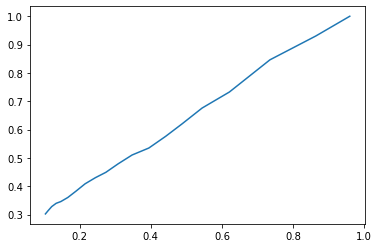

In [9]:
plt.plot((mp_q[:-1] + mp_q[1:])/2, prec41)

In [13]:
for st, en, prec_val in zip(mp_q[:-1], mp_q[1:], prec41):
    print(st, prec_val)

0.0 0.3023255813953488
0.10687294080853463 0.3137254901960784
0.11513808779418469 0.3281653746770026
0.1271947599714622 0.33972602739726027
0.1400188062340021 0.34593023255813954
0.15356721141974308 0.36024844720496896
0.17915156111121178 0.38205980066445183
0.19849760562647129 0.40860215053763443
0.23160223662853247 0.43023255813953487
0.25646484657190743 0.4491525423728814
0.2904937139246613 0.4790697674418605
0.32531032159458845 0.5103092783505154
0.3692169232293964 0.5348837209302325
0.419426055578515 0.5761589403973509
0.46379263871349374 0.6201550387596899
0.5117182297166437 0.6759259259259259
0.576346210576594 0.7325581395348837
0.6653001545462759 0.8461538461538461
0.8043585488572718 0.9302325581395349
0.9231431741034608 1.0


In [12]:
mp_q[0] = 0
mp_q[-1] = 1
mp_q

array([0.        , 0.10687294, 0.11513809, 0.12719476, 0.14001881,
       0.15356721, 0.17915156, 0.19849761, 0.23160224, 0.25646485,
       0.29049371, 0.32531032, 0.36921692, 0.41942606, 0.46379264,
       0.51171823, 0.57634621, 0.66530015, 0.80435855, 0.92314317,
       1.        ])

In [15]:
prec41[-1] = 1.0

In [16]:
def find_prec(st, en, prec1, prec2, cur_mp):
    
    def find_kb(coords1, coords2):
        #y1 = kx1 + b
        #y2 = kx2 + b
        #y1- y2 = k(x1 - x2)
        #k = (y1-y2)/(x1-x2)
        #b=y1-kx1
        k = coords1[1] - coords2[1]
        k /= coords1[0] - coords2[0]
        b = coords1[1] - k * coords1[0]
        return k, b
    
    k, b = find_kb([st, prec1], [en, prec2])
    if st <= cur_mp and cur_mp <= en:
        return k * cur_mp + b
    else:
        return -1

In [25]:
df = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv')
df = df.sort_values(by='max_pred', axis='index', ascending=True)
df['mpp'] = 0
df.index = np.arange(len(df))
df.head(4)

RA        DEC  area       min_rad   max_rad  mean_rad  min_pred  \
0   80.739063  -1.298711   1.0  0.000000e+00  1.414214  0.853553  0.100002   
1  149.798243  54.081141   1.0  0.000000e+00  1.414214  0.853553  0.100004   
2   64.810863 -26.402030   1.0  1.136868e-13  1.414214  0.853553  0.100010   
3   13.129393  39.918397   1.0  0.000000e+00  1.414214  0.853553  0.100023   

   max_pred  tRA  tDEC status catalog  M500   z       pix2  mpp  
0  0.100002  NaN   NaN     fp     NaN   NaN NaN  train_pix    0  
1  0.100004  NaN   NaN     fp     NaN   NaN NaN  train_pix    0  
2  0.100010  NaN   NaN     fp     NaN   NaN NaN  train_pix    0  
3  0.100023  NaN   NaN     fp     NaN   NaN NaN  train_pix    0

In [26]:
i = 0
st = mp_q[i]
en = mp_q[i + 1]
prec1 = prec41[i]
prec2 = prec41[i + 1]
for j in tqdm(range(len(df))):
    line = df.iloc[j]
    mp = line['max_pred']
    if mp > en:
        i += 1
        st = mp_q[i]
        if i + 1 >= len(mp_q):
            en = 1
        else:
            en = mp_q[i + 1]
        prec1 = prec41[i]
        prec2 = prec41[i + 1]
    prec_val = find_prec(st, en, prec1, prec2, mp)
    if prec_val < 0 or not (prec1 <=prec_val and prec_val <= prec2):
        break
    df.loc[j, 'mpp'] = prec_val

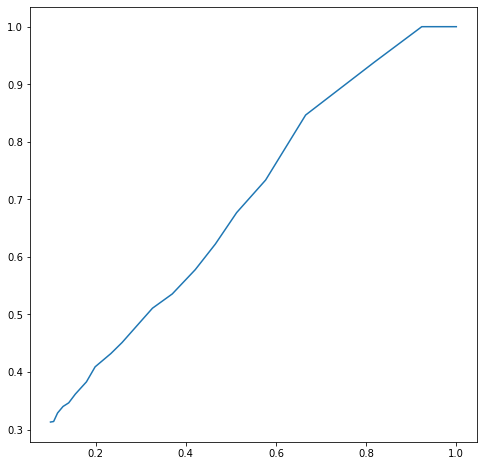

In [27]:
_, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(df['max_pred'], df['mpp'])

In [24]:
df

RA        DEC  area       min_rad   max_rad  mean_rad  \
18161   80.739063  -1.298711   1.0  0.000000e+00  1.414214  0.853553   
3011   149.798243  54.081141   1.0  0.000000e+00  1.414214  0.853553   
17305   64.810863 -26.402030   1.0  1.136868e-13  1.414214  0.853553   
16756   13.129393  39.918397   1.0  0.000000e+00  1.414214  0.853553   
2403    55.778215  77.164844   1.0  0.000000e+00  1.414214  0.853553   
...           ...        ...   ...           ...       ...       ...   
21883  243.983913  -6.150970  40.0  1.935608e+00  5.988273  3.705241   
22067   90.796013  42.214613  33.0  1.811333e+00  5.601533  3.515987   
18174   85.663133  -1.720311  64.0  7.749851e-01  7.825358  5.091448   
18173   85.277300  -1.613652  36.0  2.201086e+00  5.766286  3.571320   
15971   34.917374   1.632254  19.0  1.595903e+00  3.510434  2.575054   

       min_pred  max_pred         tRA       tDEC status   catalog       M500  \
18161  0.100002  0.100002         NaN        NaN     fp       NaN        NaN   
3011   0.100004  0.100004         NaN        NaN     fp       NaN        NaN   
17305  0.100010  0.100010         NaN        NaN     fp       NaN        NaN   
16756  0.100023  0.100023         NaN        NaN     fp       NaN        NaN   
2403   0.100039  0.100039         NaN        NaN     fp       NaN        NaN   
...         ...       ...         ...        ...    ...       ...        ...   
21883  0.106300  0.999788  243.954880  -6.152363     tp  planck_z  16.116468   
22067  0.103833  0.999954   90.839443  42.232290     tp  planck_z  10.759314   
18174  0.100268  0.999978         NaN        NaN     fp       NaN        NaN   
18173  0.112442  1.000000         NaN        NaN     fp       NaN        NaN   
15971  0.109375  1.000000         NaN        NaN     fp       NaN        NaN   

           z       pix2       mpp  
18161    NaN  train_pix  0.616647  
3011     NaN  train_pix  0.334426  
17305    NaN  train_pix  0.574092  
16756    NaN  train_pix  0.552543  
2403     NaN  train_pix  0.329636  
...      ...        ...       ...  
21883  0.203  train_pix  0.931355  
22067  0.228  train_pix  0.947345  
18174    NaN  train_pix  0.617263  
18173    NaN  train_pix  0.617161  
15971    NaN  train_pix  0.528551  

[23352 rows x 16 columns]

In [28]:
df.to_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn_mpp.csv', index=False)